## Question 4

### 4a

In [1]:
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression

In [2]:
google_df = yf.download('GOOG', 
                      start='2010-01-01', 
                      end='2020-11-10', 
                      progress=False)[["Adj Close"]]
google_df.tail()

,Adj Close
Date,
2020-11-03,1650.209961
2020-11-04,1749.130005
2020-11-05,1763.369995
2020-11-06,1761.750000
2020-11-09,1763.000000


In [3]:
google_df[["MA_1"]] = google_df[["Adj Close"]]
google_df[["MA_2"]] = google_df[["Adj Close"]].rolling(2).mean()
google_df[["MA_5"]] = google_df[["Adj Close"]].rolling(5).mean()
google_df[["MA_10"]] = google_df[["Adj Close"]].rolling(10).mean()

C:\Users\Courage Ekoh\anaconda3\lib\site-packages\pandas\core\frame.py:2963: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [4]:
google_df.head(20)

,Adj Close,MA_1,MA_2,MA_5,MA_10
Date,,,,,
2009-12-31,308.832428,308.832428,NaN,NaN,NaN
2010-01-04,312.204773,312.204773,310.518600,NaN,NaN
2010-01-05,310.829926,310.829926,311.517349,NaN,NaN
2010-01-06,302.994293,302.994293,306.912109,NaN,NaN
2010-01-07,295.940735,295.940735,299.467514,306.160431,NaN
2010-01-08,299.885956,299.885956,297.913345,304.371136,NaN
2010-01-11,299.432648,299.432648,299.659302,301.816711,NaN
2010-01-12,294.137512,294.137512,296.785080,298.478229,NaN
2010-01-13,292.448822,292.448822,293.293167,296.369135,NaN


In [5]:
google_df.dropna(inplace = True)

<ipython-input-5-d4179bca8895>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  google_df.dropna(inplace = True)


In [6]:
google_df.head(20)

,Adj Close,MA_1,MA_2,MA_5,MA_10
Date,,,,,
2010-01-14,293.823669,293.823669,293.136246,295.945721,301.053076
2010-01-15,288.917053,288.917053,291.370361,293.751941,299.061539
2010-01-19,292.712830,292.712830,290.814941,292.407977,297.112344
2010-01-20,289.121307,289.121307,290.917068,291.404736,294.941483
2010-01-21,290.401489,290.401489,289.761398,290.995270,293.682202
2010-01-22,273.978058,273.978058,282.189774,287.026147,291.485934
2010-01-25,268.991760,268.991760,271.484909,283.041089,288.396515
2010-01-26,270.197235,270.197235,269.594498,278.537970,285.472974
2010-01-27,270.037842,270.037842,270.117538,274.721277,283.063007


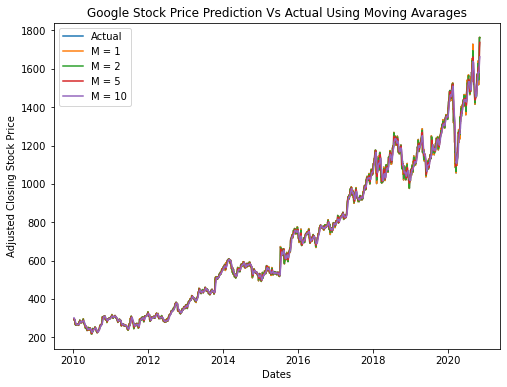

In [7]:
plt.figure(figsize=(8,6))
plt.plot(google_df['Adj Close'], label = "Actual");
plt.plot(google_df.MA_1, label = "M = 1");
plt.plot(google_df.MA_2, label = "M = 2");
plt.plot(google_df.MA_5, label = "M = 5");
plt.plot(google_df.MA_10, label = "M = 10");
plt.legend();
plt.title("Google Stock Price Prediction Vs Actual Using Moving Avarages");
plt.xlabel("Dates")
plt.ylabel("Adjusted Closing Stock Price");

### 4b

In [8]:
google_df["MA_1_Error"] = google_df["Adj Close"] - google_df["MA_1"]
google_df["MA_2_Error"] = google_df["Adj Close"] - google_df["MA_2"]
google_df["MA_5_Error"] = google_df["Adj Close"] - google_df["MA_5"]
google_df["MA_10_Error"] = google_df["Adj Close"] - google_df["MA_10"]


<ipython-input-8-0171ce740765>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  google_df["MA_1_Error"] = google_df["Adj Close"] - google_df["MA_1"]
<ipython-input-8-0171ce740765>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  google_df["MA_2_Error"] = google_df["Adj Close"] - google_df["MA_2"]
<ipython-input-8-0171ce740765>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the document

In [9]:
google_df.head()

,Adj Close,MA_1,MA_2,MA_5,MA_10,MA_1_Error,MA_2_Error,MA_5_Error,MA_10_Error
Date,,,,,,,,,
2010-01-14,293.823669,293.823669,293.136246,295.945721,301.053076,0.0,0.687424,-2.122052,-7.229407
2010-01-15,288.917053,288.917053,291.370361,293.751941,299.061539,0.0,-2.453308,-4.834888,-10.144485
2010-01-19,292.712830,292.712830,290.814941,292.407977,297.112344,0.0,1.897888,0.304852,-4.399515
2010-01-20,289.121307,289.121307,290.917068,291.404736,294.941483,0.0,-1.795761,-2.283429,-5.820175
2010-01-21,290.401489,290.401489,289.761398,290.995270,293.682202,0.0,0.640091,-0.593781,-3.280713


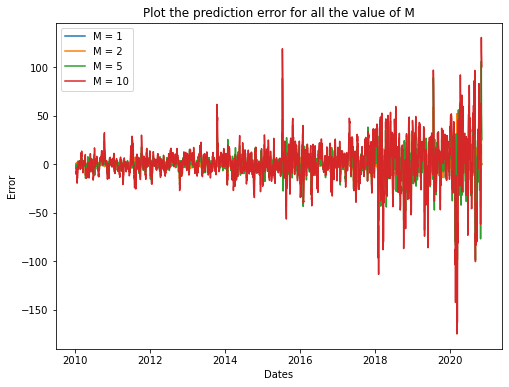

In [10]:
plt.figure(figsize=(8,6))
plt.plot(google_df.MA_1_Error, label = "M = 1");
plt.plot(google_df.MA_2_Error, label = "M = 2");
plt.plot(google_df.MA_5_Error, label = "M = 5");
plt.plot(google_df.MA_10_Error, label = "M = 10");
plt.legend();
plt.title("Plot the prediction error for all the value of M");
plt.xlabel("Dates")
plt.ylabel("Error");

### 4c

In [11]:
X_t = np.array([0, 0, 0, 0, 0, 0])
y_t = np.array([0])
for i in range(google_df.shape[0]-6):
    X = np.flipud(google_df.MA_1.iloc[i:i+6])
    y = np.flipud(google_df.MA_1.iloc[i+6:i+7])
    X = np.array(X).transpose()
    X_t = np.vstack((X_t,X))
    y_t = np.vstack((y_t,y))
X_t = X_t[1:]
y_t = y_t[1:]

In [12]:
LR = LinearRegression()
LR.fit(X_t, y_t)

LinearRegression()

In [13]:
LR.coef_

array([[ 0.89069375,  0.12107285,  0.00113309, -0.03366134,  0.0319415 ,
        -0.01050984]])